In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [73]:
# fn = 'M3.h5'
fn = 'M3.h5'
f = h5py.File(fn, 'r')
f['measurement0'].keys()

<KeysViewHDF5 ['Detectormask', 'analyzed', 'fiducials', 'genraw', 'maskshapes', 'padding_offsets', 'reserve_interferogram', 'roi_rect', 'unitcircle']>

<ipython-input-116-3edf6283c34e>:2: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  dmask = f['measurement0'].get('Detectormask').value
<ipython-input-116-3edf6283c34e>:3: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  genraw_data = f['measurement0']['genraw'].get('data').value
<ipython-input-116-3edf6283c34e>:13: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  data = h5py.File(h5pth,'r')['measurement0']['genraw'].get('data').value


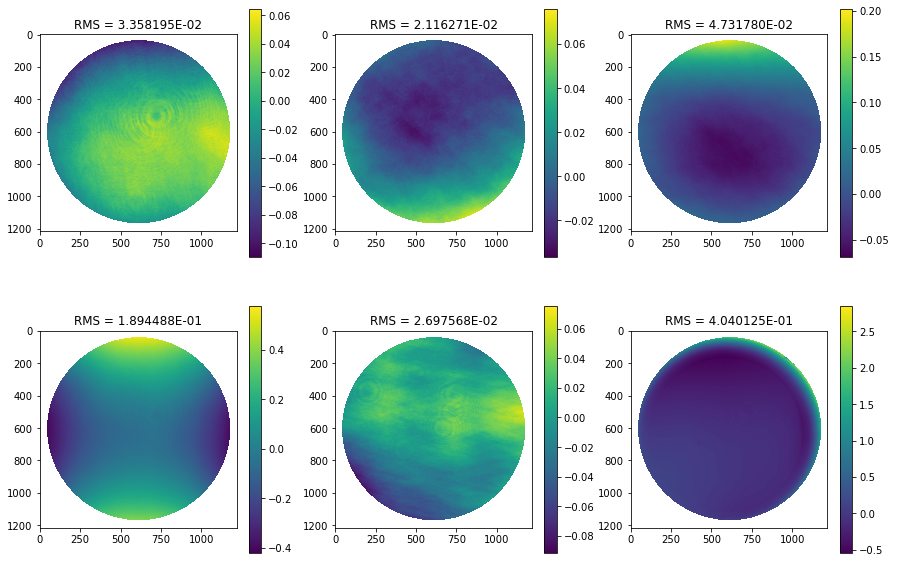

In [116]:
meas0 = f['measurement0']
dmask = f['measurement0'].get('Detectormask').value
genraw_data = f['measurement0']['genraw'].get('data').value
genraw_data[genraw_data >= 1000] = 0
# plt.imshow(genraw_data)
# plt.colorbar()

# It doesn't say but the data looks like waves. Write a function to get the piston/tip/tilt subtracted array.

def SubtractPistonTipTilt(h5pth):
    
    import h5py
    data = h5py.File(h5pth,'r')['measurement0']['genraw'].get('data').value
    
    # mask out the 1e38 vals at the edge of the detector
    data = np.ma.masked_greater(data,1000)
    
    # Let's use masked arrays to make this easy
    clone = data*0 + 1 
    
    
    # dimension of masked array
    dim = max(clone.count(axis=1))
    
    x = np.linspace(-1,1,clone.shape[0])
    x,y = np.meshgrid(x,x)
    
    Z1 = clone
    Z2 = Z1*x
    Z2 /= np.ma.max(Z2[609,:])
    Z3 = Z1*y
    Z3 /= np.ma.max(Z3[:,609])
    
    
    # grab coefficient
    z1coeff = np.ma.mean(Z1*data)
    z2coeff = np.ma.mean(Z2*data)
    z3coeff = np.ma.mean(Z3*data)
    
#     plt.figure(figsize=[15,5])
#     plt.subplot(131)
#     plt.imshow(Z1*z1coeff)
#     plt.colorbar()
#     plt.subplot(132)
#     plt.imshow(Z2*z2coeff)
#     plt.colorbar()
#     plt.subplot(133)
#     plt.imshow(Z3*z3coeff)
#     plt.colorbar()
#     plt.show()
    
#     print('Piston = ',z1coeff)
    
    data = data - z1coeff*Z1 - z2coeff*Z2 - z3coeff*Z3
    rms = np.std(data)
    
    return data,rms

oap0data,oap0rms = SubtractPistonTipTilt('M3.h5')
flat1data,flat1rms = SubtractPistonTipTilt('FLAT1.h5')
flat2data,flat2rms = SubtractPistonTipTilt('FLAT2.h5')
oap1data,oap1rms = SubtractPistonTipTilt('OAP1.h5')
oap2data,oap2rms = SubtractPistonTipTilt('OAP2.h5')
oap3data,oap3rms = SubtractPistonTipTilt('OAP3.h5')

plt.figure(figsize=[15,10])

# OAP0
plt.subplot(231)
plt.imshow(oap0data)
plt.colorbar()
plt.title('RMS = {:2E}'.format(oap0rms))

plt.subplot(232)
plt.imshow(flat1data)
plt.colorbar()
plt.title('RMS = {:2E}'.format(flat1rms))

plt.subplot(233)
plt.imshow(flat2data)
plt.colorbar()
plt.title('RMS = {:2E}'.format(flat2rms))

plt.subplot(234)
plt.imshow(oap1data)
plt.colorbar()
plt.title('RMS = {:2E}'.format(oap1rms))

plt.subplot(235)
plt.imshow(oap2data)
plt.colorbar()
plt.title('RMS = {:2E}'.format(oap2rms))

plt.subplot(236)
plt.imshow(oap3data)
plt.colorbar()
plt.title('RMS = {:2E}'.format(oap3rms))

plt.show()

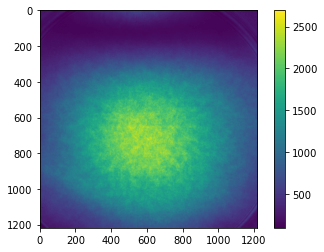

In [70]:
intfgm = meas0['reserve_interferogram']['frame4']['data']
plt.imshow(intfgm)
plt.colorbar()

<HDF5 group "/measurement0/unitcircle" (0 members)>